In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('Pistachio_Image_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib

import splitfolders 
import glob
import plotly.express as px


Pistachio_Image_Dataset\Pistachio_Image_Dataset_Request.txt
Pistachio_Image_Dataset\Pistachio_16_Features_Dataset\Pistachio_16_Features_Dataset.arff
Pistachio_Image_Dataset\Pistachio_16_Features_Dataset\Pistachio_16_Features_Dataset.xls
Pistachio_Image_Dataset\Pistachio_16_Features_Dataset\Pistachio_16_Features_Dataset.xlsx
Pistachio_Image_Dataset\Pistachio_16_Features_Dataset\Pistachio_16_Features_Dataset_Citation_Request.txt
Pistachio_Image_Dataset\Pistachio_28_Features_Dataset\Pistachio_28_Features_Dataset.arff
Pistachio_Image_Dataset\Pistachio_28_Features_Dataset\Pistachio_28_Features_Dataset.xls
Pistachio_Image_Dataset\Pistachio_28_Features_Dataset\Pistachio_28_Features_Dataset.xlsx
Pistachio_Image_Dataset\Pistachio_28_Features_Dataset\Pistachio_28_Features_Dataset_Citation_Request.txt
Pistachio_Image_Dataset\Pistachio_Image_Dataset\Pistachio_Image_Dataset_Request.txt
Pistachio_Image_Dataset\Pistachio_Image_Dataset\Kirmizi_Pistachio\kirmizi (1).jpg
Pistachio_Image_Dataset\Pistachi

<h1>setting path</h1>

In [2]:
data_dir = "Pistachio_Image_Dataset/Pistachio_Image_Dataset/"
data_dir =pathlib.Path(data_dir)

In [3]:
Total_Images = glob.glob('Pistachio_Image_Dataset/Pistachio_Image_Dataset/*/*.jpg')
print("Total number of images: ", len(Total_Images))

Total_Images = pd.Series(Total_Images)

Total number of images:  2148


In [4]:
total_df = pd.DataFrame()

# 生成 Filename 字段
total_df['Filename'] = Total_Images.map(lambda img_name: os.path.basename(img_name))

# 生成 ClassId 字段
total_df['ClassId'] = Total_Images.map(lambda img_name: os.path.basename(os.path.dirname(img_name)))

total_df.head()

,Filename,ClassId
0,kirmizi (1).jpg,Kirmizi_Pistachio
1,kirmizi (10).jpg,Kirmizi_Pistachio
2,kirmizi (11).jpg,Kirmizi_Pistachio
3,kirmizi (12).jpg,Kirmizi_Pistachio
4,kirmizi (13).jpg,Kirmizi_Pistachio


In [5]:
class_id_distributionTotal = total_df['ClassId'].value_counts()
class_id_distributionTotal.head(10)

ClassId
Kirmizi_Pistachio    1232
Siirt_Pistachio       916
Name: count, dtype: int64

<h1>Splitting data into Train, Test, Val data set</h1>

In [6]:
splitfolders.ratio(data_dir, output="output", seed=101, ratio=(.8, .1, .1))

Copying files: 2148 files [00:10, 200.52 files/s]


In [7]:
train_path='./output/train/'
val_path='./output/val'
test_path='./output/test'
class_names=os.listdir(train_path)
class_names_val=os.listdir(val_path)
class_names_test=os.listdir(test_path)

In [8]:
train_image1 = glob.glob('./output/train/*/*.jpg')
Total_TrainImages = train_image1 
print("Total number of training images: ", len(Total_TrainImages))


test_image1 = glob.glob('./output/test/*/*.jpg')
Total_TestImages = test_image1 
print("Total number of test images: ", len(Total_TestImages))



Val_image1 = glob.glob('./output/val/*/*.jpg')

Total_ValImages = Val_image1 
print("Total number of val images: ", len(Total_ValImages))

Total number of training images:  1717
Total number of test images:  217
Total number of val images:  214


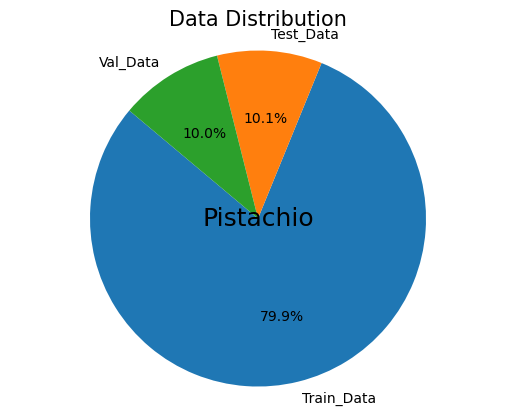

In [9]:
# 数据准备
sizes = [len(Total_TrainImages), len(Total_TestImages), len(Total_ValImages)]
labels = ['Train_Data', 'Test_Data', 'Val_Data']

# 绘制饼图
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# 设置标题
ax.set_title('Data Distribution', fontsize=15, loc='center')

# 添加注释
plt.text(0, 0, 'Pistachio', ha='center', va='center', fontsize=18)

# 显示图表
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [10]:
train_image_names = pd.Series(Total_TrainImages)
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = train_image_names.map( lambda img_name:os.path.basename(img_name))

# generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name:os.path.basename(os.path.dirname(img_name)))

train_df.head()

,Filename,ClassId
0,kirmizi (1).jpg,Kirmizi_Pistachio
1,kirmizi (10).jpg,Kirmizi_Pistachio
2,kirmizi (11).jpg,Kirmizi_Pistachio
3,kirmizi (12).jpg,Kirmizi_Pistachio
4,kirmizi (13).jpg,Kirmizi_Pistachio


In [11]:
class_id_distribution_Train = train_df['ClassId'].value_counts()
class_id_distribution_Train.head(10)

ClassId
Kirmizi_Pistachio    985
Siirt_Pistachio      732
Name: count, dtype: int64

image

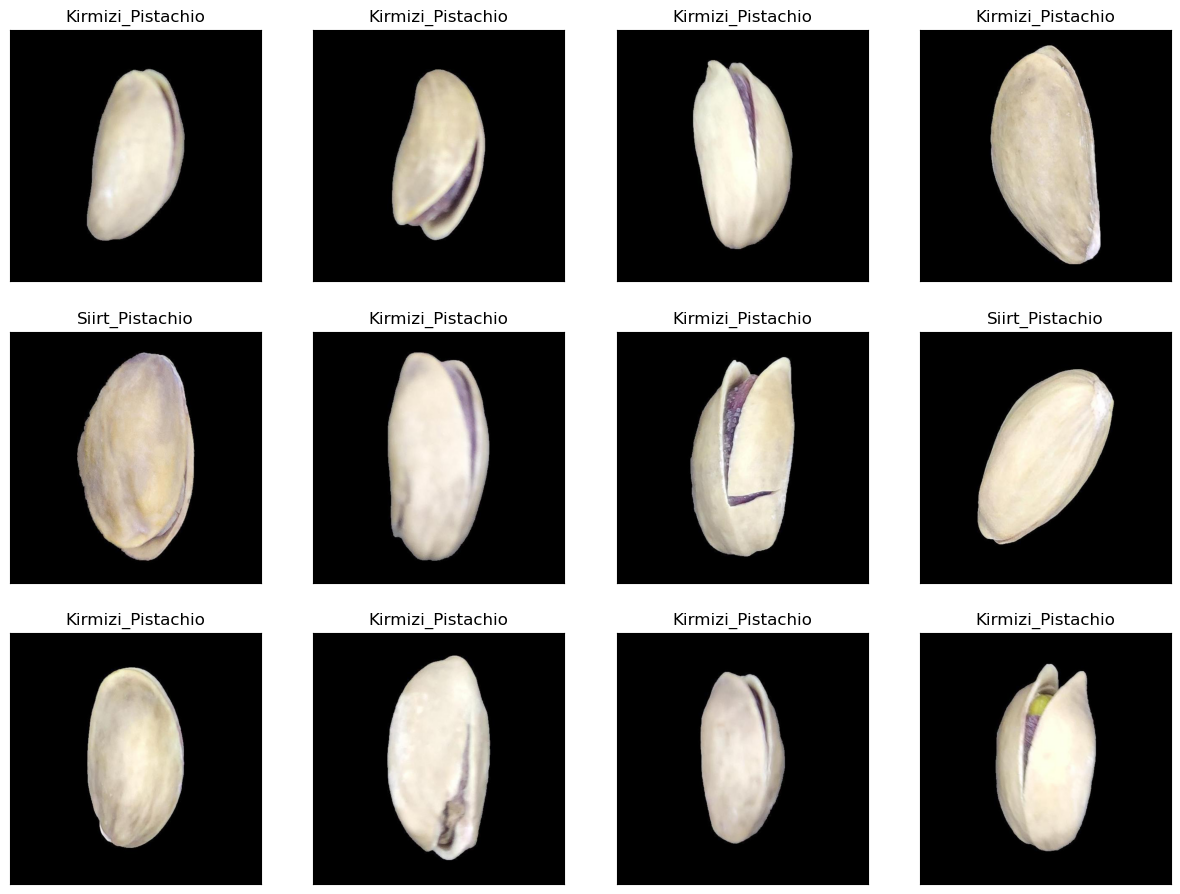

In [12]:
plot_df = train_df.sample(12).reset_index()
plt.figure(figsize=(15, 15))

for i in range(12):
    img_name = plot_df.loc[i, 'Filename']
    label_str = (plot_df.loc[i, 'ClassId'])
    plt.subplot(4,4,i+1)
    plt.imshow(plt.imread(os.path.join(train_path,label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])
    plt.yticks([])

<h1> EfficientNet</h1>

In [13]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define data transforms
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.15, hue=0.15),
    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2), shear=0.15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(root=train_path, transform=train_transforms)
test_dataset = datasets.ImageFolder(root=test_path, transform=test_transforms)
val_dataset = datasets.ImageFolder(root=val_path, transform=test_transforms)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)


In [14]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load the pre-trained EfficientNet model
model = models.efficientnet_b0(pretrained=False)

# Modify the model for binary classification
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_features, 1),
    nn.Sigmoid()
)

# Set layers to be trainable
for param in model.parameters():
    param.requires_grad = False

# Only fine-tune the last few layers
for param in model.classifier.parameters():
    param.requires_grad = True

# Check which layers are trainable
for name, param in model.named_parameters():
    print(f"{name}: {param.requires_grad}")


features.0.0.weight: False
features.0.1.weight: False
features.0.1.bias: False
features.1.0.block.0.0.weight: False
features.1.0.block.0.1.weight: False
features.1.0.block.0.1.bias: False
features.1.0.block.1.fc1.weight: False
features.1.0.block.1.fc1.bias: False
features.1.0.block.1.fc2.weight: False
features.1.0.block.1.fc2.bias: False
features.1.0.block.2.0.weight: False
features.1.0.block.2.1.weight: False
features.1.0.block.2.1.bias: False
features.2.0.block.0.0.weight: False
features.2.0.block.0.1.weight: False
features.2.0.block.0.1.bias: False
features.2.0.block.1.0.weight: False
features.2.0.block.1.1.weight: False
features.2.0.block.1.1.bias: False
features.2.0.block.2.fc1.weight: False
features.2.0.block.2.fc1.bias: False
features.2.0.block.2.fc2.weight: False
features.2.0.block.2.fc2.bias: False
features.2.0.block.3.0.weight: False
features.2.0.block.3.1.weight: False
features.2.0.block.3.1.bias: False
features.2.1.block.0.0.weight: False
features.2.1.block.0.1.weight: Fals

D:\anaconda3\envs\pytorch_py310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\anaconda3\envs\pytorch_py310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<h1>Training</h1>

In [15]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

numEpochs = 30
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=numEpochs):
    best_val_acc = 0.0
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        corrects = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels.float())
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            preds = (outputs.squeeze() > 0.5).long()
            corrects += torch.sum(preds == labels)
            total += labels.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = corrects.double() / total
        
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())
        
        print(f"Epoch {epoch}/{num_epochs - 1}")
        print(f"Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

        # Validation
        model.eval()
        val_loss = 0.0
        val_corrects = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), labels.float())
                
                val_loss += loss.item() * inputs.size(0)
                preds = (outputs.squeeze() > 0.5).long()
                val_corrects += torch.sum(preds == labels)
                val_total += labels.size(0)
        
        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / val_total
        
        val_losses.append(val_loss)
        val_accuracies.append(val_acc.item())
        
        print(f"Validation Loss: {val_loss:.4f} Validation Acc: {val_acc:.4f}")

        # Save the best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'EfficientNet_best_model.pth')

    
train_model(model, train_loader, val_loader, criterion, optimizer)


Epoch 0/29
Loss: 0.6898 Acc: 0.5725
Validation Loss: 0.6834 Validation Acc: 0.5748
Epoch 1/29
Loss: 0.6911 Acc: 0.5655
Validation Loss: 0.6760 Validation Acc: 0.5748
Epoch 2/29
Loss: 0.6918 Acc: 0.5644
Validation Loss: 0.6775 Validation Acc: 0.5748
Epoch 3/29
Loss: 0.6941 Acc: 0.5702
Validation Loss: 0.6782 Validation Acc: 0.5748
Epoch 4/29
Loss: 0.6904 Acc: 0.5719
Validation Loss: 0.6788 Validation Acc: 0.5748
Epoch 5/29
Loss: 0.6919 Acc: 0.5708
Validation Loss: 0.6817 Validation Acc: 0.5748
Epoch 6/29
Loss: 0.6851 Acc: 0.5812
Validation Loss: 0.6789 Validation Acc: 0.5748
Epoch 7/29
Loss: 0.6956 Acc: 0.5737
Validation Loss: 0.6785 Validation Acc: 0.5748
Epoch 8/29
Loss: 0.6988 Acc: 0.5737
Validation Loss: 0.6750 Validation Acc: 0.5748
Epoch 9/29
Loss: 0.6949 Acc: 0.5801
Validation Loss: 0.6773 Validation Acc: 0.5748
Epoch 10/29
Loss: 0.6960 Acc: 0.5807
Validation Loss: 0.6753 Validation Acc: 0.5748
Epoch 11/29
Loss: 0.6922 Acc: 0.5620
Validation Loss: 0.6819 Validation Acc: 0.5701
Ep

KeyboardInterrupt: 

In [ ]:
# Plotting the curves
epochs_range = range(numEpochs)
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


<h1>Evaluation</h1>

In [ ]:
import pandas as pd
import os
from sklearn.metrics import classification_report

# Load the best model
model.load_state_dict(torch.load('EfficientNet_best_model.pth'))

# Evaluation
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = (outputs.squeeze() > 0.5).long()
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

print(classification_report(np.array(y_true), np.array(y_pred), target_names=test_dataset.classes))

# Save results to DataFrame
filenames = [os.path.basename(x[0]) for x in test_loader.dataset.imgs]
class_indices = test_loader.dataset.class_to_idx
indices = {v: k for k, v in class_indices.items()}

val_df = pd.DataFrame({
    'filename': filenames,
    'actual': [indices[x] for x in y_true],
    'predicted': [indices[x] for x in y_pred]
})
val_df['Same'] = val_df['actual'] == val_df['predicted']
val_df = val_df.sample(frac=1).reset_index(drop=True)

print(val_df.head(10))
